<a href="https://colab.research.google.com/github/prottushee/mll_project/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# CSV file load
data = pd.read_csv("33_Machine Failure Prediction using Sensor data.csv")
print(data)

     footfall  tempMode  AQ  USS  CS  VOC  RP  IP  Temperature  fail
0           0         7   7    1   6    6  36   3            1     1
1         190         1   3    3   5    1  20   4            1     0
2          31         7   2    2   6    1  24   6            1     0
3          83         4   3    4   5    1  28   6            1     0
4         640         7   5    6   4    0  68   6            1     0
..        ...       ...  ..  ...  ..  ...  ..  ..          ...   ...
939         0         7   7    1   6    4  73   6           24     1
940         0         7   5    2   6    6  50   6           24     1
941         0         3   6    2   7    5  43   6           24     1
942         0         6   6    2   5    6  46   7           24     1
943        18         7   4    2   6    3  61   7           24     1

[944 rows x 10 columns]


In [ ]:
# Dataset Overview
print("\nSummary")
print(data.describe())


Summary
          footfall    tempMode          AQ         USS          CS  \
count   944.000000  944.000000  944.000000  944.000000  944.000000   
mean    306.381356    3.727754    4.325212    2.939619    5.394068   
std    1082.606745    2.677235    1.438436    1.383725    1.269349   
min       0.000000    0.000000    1.000000    1.000000    1.000000   
25%       1.000000    1.000000    3.000000    2.000000    5.000000   
50%      22.000000    3.000000    4.000000    3.000000    6.000000   
75%     110.000000    7.000000    6.000000    4.000000    6.000000   
max    7300.000000    7.000000    7.000000    7.000000    7.000000   

              VOC          RP          IP  Temperature        fail  
count  944.000000  944.000000  944.000000   944.000000  944.000000  
mean     2.842161   47.043432    4.565678    16.331568    0.416314  
std      2.273337   16.423130    1.599287     5.974781    0.493208  
min      0.000000   19.000000    1.000000     1.000000    0.000000  
25%      1.0000

In [ ]:
#Check for Missing Values
print("\nMissing Values ===")
print(data.isnull().sum())


Missing Values ===
footfall       0
tempMode       0
AQ             0
USS            0
CS             0
VOC            0
RP             0
IP             0
Temperature    0
fail           0
dtype: int64


In [ ]:
sns.set(style="whitegrid")


Class Distribution of target variable
fail
0    58.368644
1    41.631356
Name: proportion, dtype: float64


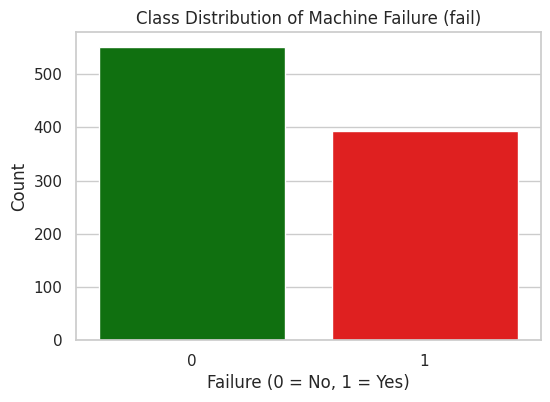

In [ ]:
#Class Distribution of Target Variable ('fail')
print("\nClass Distribution of target variable")
print(data['fail'].value_counts(normalize=True) * 100)
plt.figure(figsize=(6, 4))
sns.countplot(x='fail', data=data,  palette = {'1': 'red', '0': 'green'})
plt.title('Class Distribution of Machine Failure (fail)')
plt.xlabel('Failure (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

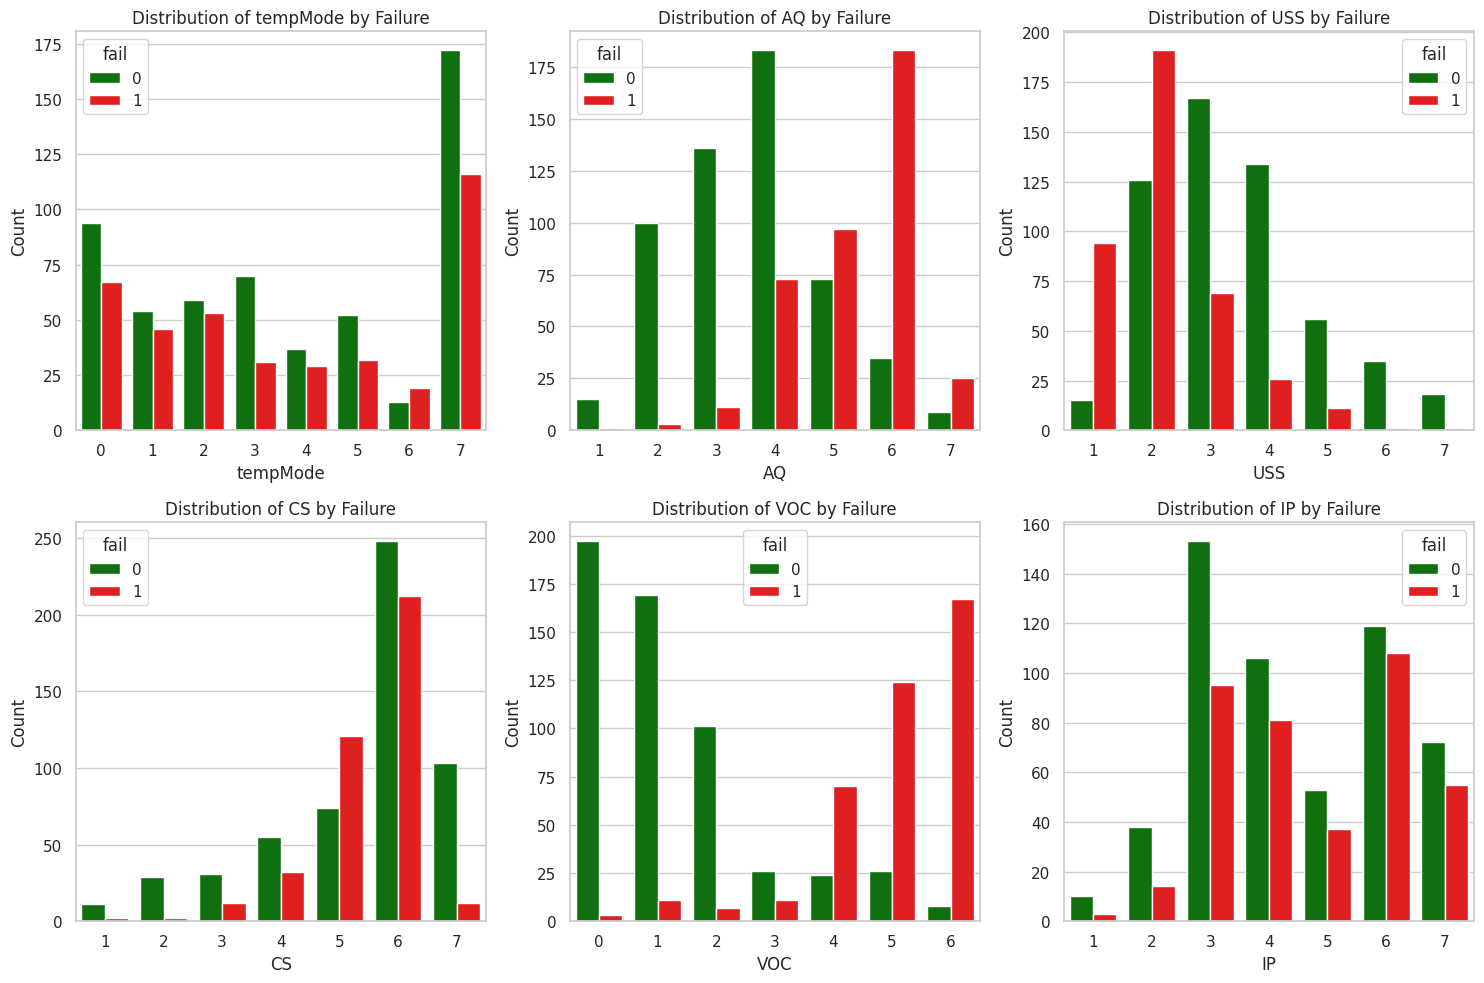

In [ ]:
# Define categorical features
categorical_features = ['tempMode', 'AQ', 'USS', 'CS', 'VOC', 'IP']

# Distribution of Ordinal Features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=feature, hue='fail', data=data, palette = {1: 'red', 0: 'green'})
    plt.title(f'Distribution of {feature} by Failure')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()



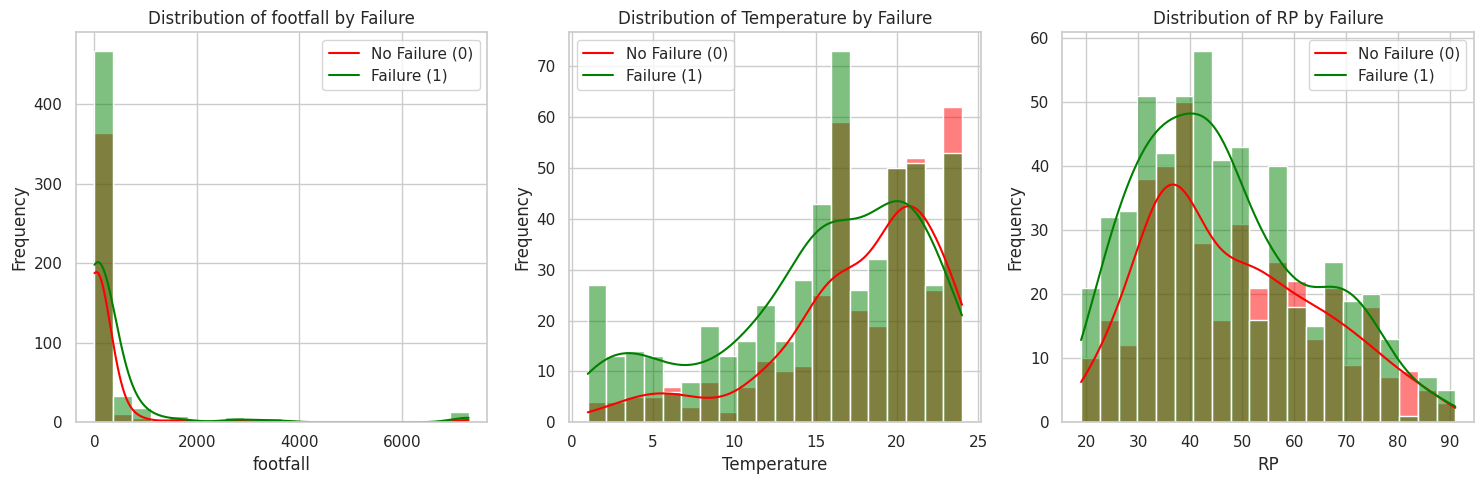

In [ ]:
# Distribution of Numerical Features (footfall, Temperature, RP)
numerical_features = ['footfall', 'Temperature', 'RP']
plt.figure(figsize=(15, 5))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data=data, x=feature, hue='fail', bins=20, kde=True, palette = {1: 'red', 0: 'green'})
    plt.title(f'Distribution of {feature} by Failure')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend(labels=['No Failure (0)', 'Failure (1)'])

plt.tight_layout()
plt.show()

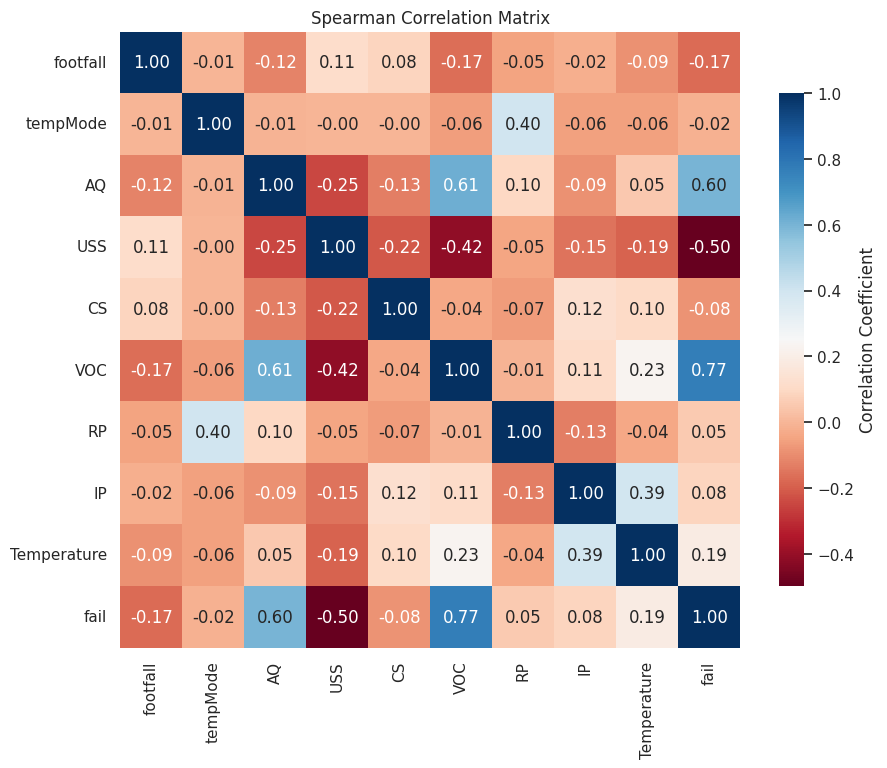

In [ ]:
# Correlation Analysis
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr(method='spearman')
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='RdBu',
            fmt='.2f',
            cbar_kws={"shrink": 0.8,
                      "label": "Correlation Coefficient"})
plt.title('Spearman Correlation Matrix')
plt.show()

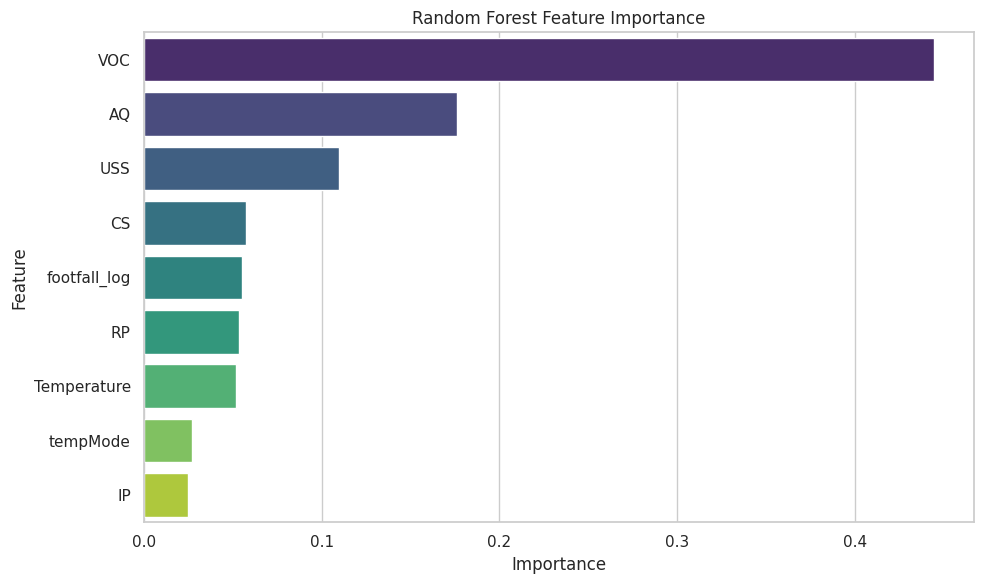

In [ ]:
importances = rf_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame(
    {'Feature': feature_names,
     'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()


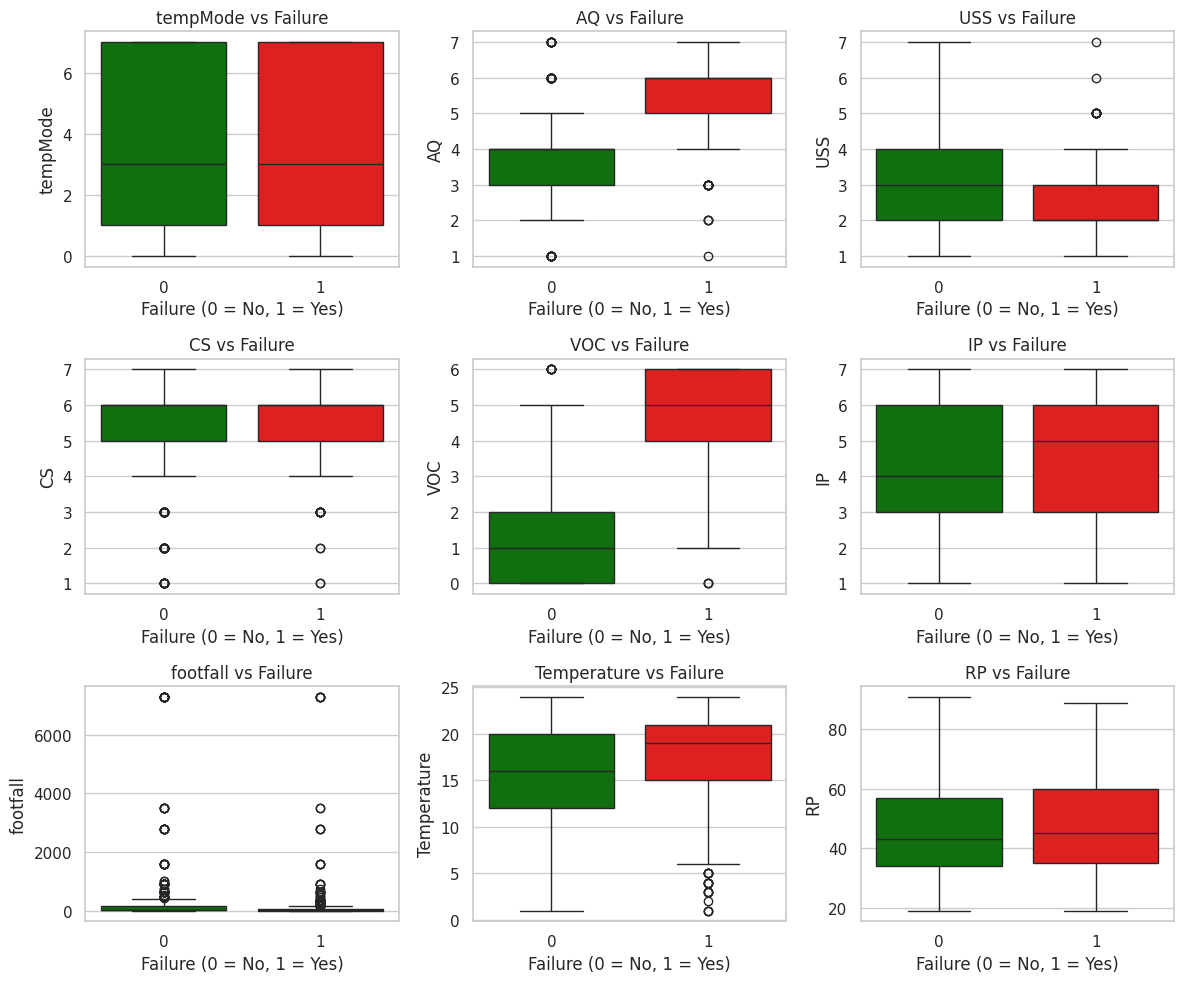

In [ ]:
# Boxplots to Explore Feature Relationships with Failure
all_features = ['tempMode', 'AQ', 'USS', 'CS', 'VOC', 'IP', 'footfall', 'Temperature', 'RP']
plt.figure(figsize=(12, 10))
for i, feature in enumerate(all_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='fail', y=feature, data=data, palette = {'1': 'red', '0': 'green'})
    plt.title(f'{feature} vs Failure')
    plt.xlabel('Failure (0 = No, 1 = Yes)')
    plt.ylabel(feature)
    plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

##Preprocessing

In [ ]:
#Preprocessing
# Log transformation for skewed feature (footfall)
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

data['footfall_log'] = data['footfall'].apply(lambda x: np.log1p(x))  # log1p handles zero values

# Identify numerical features for scaling/standardization
numerical_features = ['footfall_log', 'Temperature', 'RP']

# Scaling (MinMaxScaler) - range [0, 1]
scaler_minmax = MinMaxScaler()
data[numerical_features] = scaler_minmax.fit_transform(data[numerical_features])

# Standardization (StandardScaler) - mean=0, std=1
scaler_std = StandardScaler()
data[numerical_features] = scaler_std.fit_transform(data[numerical_features])

# Define all features for boxplots (ordinal + preprocessed numerical)
all_features = ['tempMode', 'AQ', 'USS', 'CS', 'VOC', 'IP', 'footfall_log', 'Temperature', 'RP']



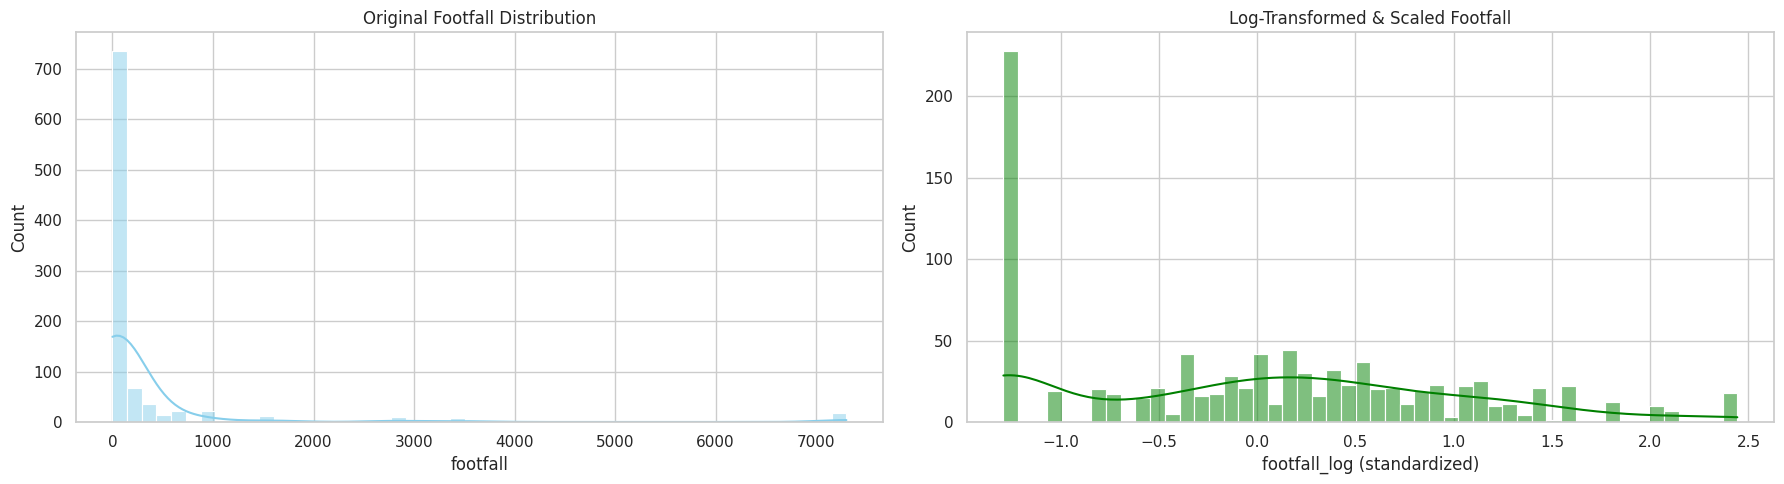

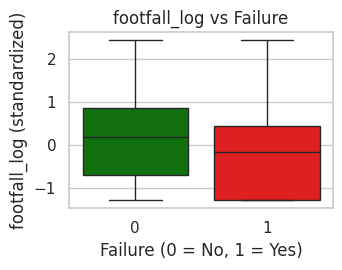

In [ ]:
data['footfall_log'] = data['footfall'].apply(lambda x: np.log1p(x))
scaler_std = StandardScaler()
data['footfall_log_scaled'] = scaler_std.fit_transform(data[['footfall_log']])
plt.figure(figsize=(18, 5))

# 1. Original footfall distribution
plt.subplot(1,2, 1)
sns.histplot(data['footfall'], bins=50, kde=True, color='skyblue')
plt.title('Original Footfall Distribution')
plt.xlabel('footfall')

# 2. Log-transformed + scaled footfall distribution
plt.subplot(1, 2, 2) # Corrected subplot index
sns.histplot(data['footfall_log_scaled'], bins=50, kde=True, color='green')
plt.title('Log-Transformed & Scaled Footfall')
plt.xlabel('footfall_log (standardized)')
plt.tight_layout()
plt.show()

# boxplot of scaled footfall
plt.subplot(2, 2, 1)
sns.boxplot(x='fail', y='footfall_log_scaled', data=data, palette = {'1': 'red', '0': 'green'})
plt.title(f'footfall_log vs Failure')
plt.xlabel('Failure (0 = No, 1 = Yes)')
plt.ylabel('footfall_log (standardized)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


--- Random Forest Classification Report ---
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       166
           1       0.90      0.92      0.91       118

    accuracy                           0.93       284
   macro avg       0.92      0.93      0.92       284
weighted avg       0.93      0.93      0.93       284

Random Forest ROC-AUC: 0.9796

--- KNN (k=7) Classification Report ---
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       166
           1       0.88      0.94      0.91       118

    accuracy                           0.92       284
   macro avg       0.92      0.93      0.92       284
weighted avg       0.92      0.92      0.92       284

KNN (k=7) ROC-AUC: 0.9666


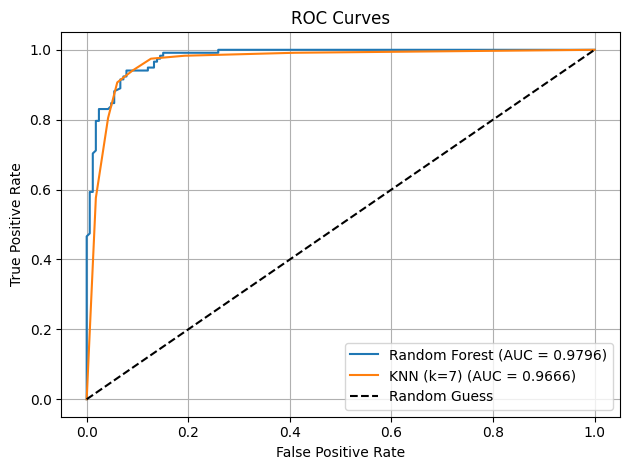

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    classification_report, confusion_matrix, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
data = pd.read_csv('33_Machine Failure Prediction using Sensor data.csv')

# 1. Feature Engineering
data['footfall_log'] = data['footfall'].apply(lambda x: np.log1p(x))

# Identify features
numerical_features = ['footfall_log', 'Temperature', 'RP']
ordinal_features = ['tempMode', 'AQ', 'USS', 'CS', 'VOC', 'IP']
all_features = numerical_features + ordinal_features

# Scaling numerical features only
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Define features and target
X = data[all_features]
y = data['fail']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Model Training
# Random Forest
rf_model = RandomForestClassifier(
    n_estimators=500,
    max_depth=15,
    class_weight='balanced',
    random_state=42
)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_prob = rf_model.predict_proba(X_test)[:, 1]

# KNN Model with random k
k = 7
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_prob = knn_model.predict_proba(X_test)[:, 1]

# Evaluation summary function
def evaluate_model(y_true, y_pred, y_prob, model_name):
    print(f"\n--- {model_name} Classification Report ---")
    print(classification_report(y_true, y_pred))
    auc = roc_auc_score(y_true, y_prob)
    print(f"{model_name} ROC-AUC: {auc:.4f}")

    fpr, tpr, _ = roc_curve(y_true, y_prob)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.4f})')

# Evaluate Random Forest
evaluate_model(y_test, rf_pred, rf_prob, 'Random Forest')

# Evaluate KNN
evaluate_model(y_test, knn_pred, knn_prob, 'KNN (k=7)')

# Plot ROC curves for both models
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Random Forest (Tuned):
  Accuracy: 0.9120
  Precision: 0.8843
  Recall: 0.9068
  F1-Score: 0.8954
  ROC-AUC: 0.9772

KNN (Tuned):
  Accuracy: 0.9261
  Precision: 0.8819
  Recall: 0.9492
  F1-Score: 0.9143
  ROC-AUC: 0.9722



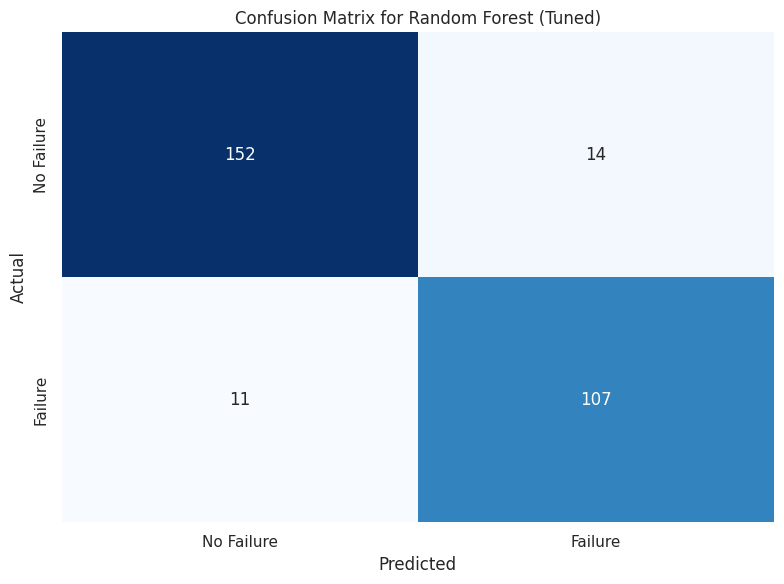

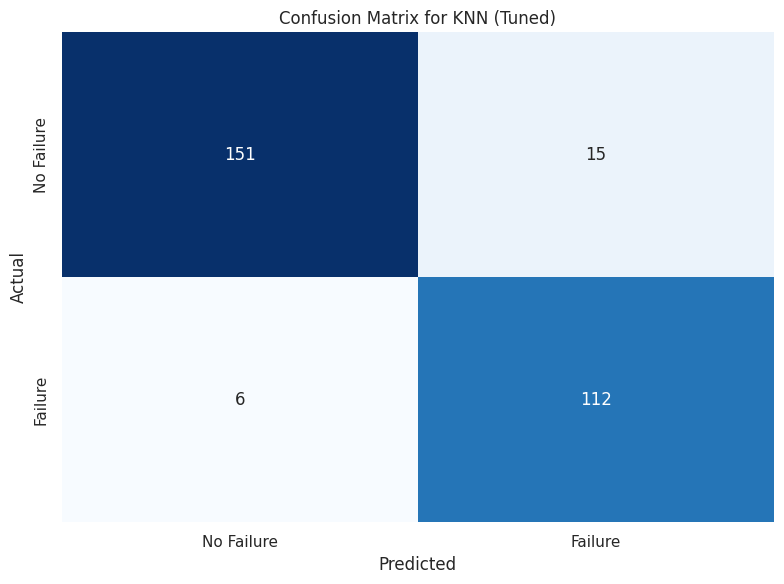

In [ ]:
# Compute metrics
metrics = {}
for name, (pred, prob) in predictions.items():
    metrics[name] = {
        'Accuracy': accuracy_score(y_test, pred),
        'Precision': precision_score(y_test, pred),
        'Recall': recall_score(y_test, pred),
        'F1-Score': f1_score(y_test, pred),
        'ROC-AUC': roc_auc_score(y_test, prob)
    }

# Print metrics
for name, scores in metrics.items():
    print(f"{name}:")
    for metric, value in scores.items():
        print(f"  {metric}: {value:.4f}")
    print()

# Visualizations
# Confusion Matrix
for name, (pred, _) in predictions.items():
    cm = confusion_matrix(y_test, pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No Failure', 'Failure'], yticklabels=['No Failure', 'Failure'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()



FOR CV = 5

--- Random Forest (Tuned) Classification Report ---
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       166
           1       0.90      0.92      0.91       118

    accuracy                           0.92       284
   macro avg       0.92      0.92      0.92       284
weighted avg       0.92      0.92      0.92       284

Random Forest (Tuned) ROC-AUC: 0.9796

--- KNN (Tuned) Classification Report ---
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       166
           1       0.88      0.95      0.91       118

    accuracy                           0.93       284
   macro avg       0.92      0.93      0.92       284
weighted avg       0.93      0.93      0.93       284

KNN (Tuned) ROC-AUC: 0.9722


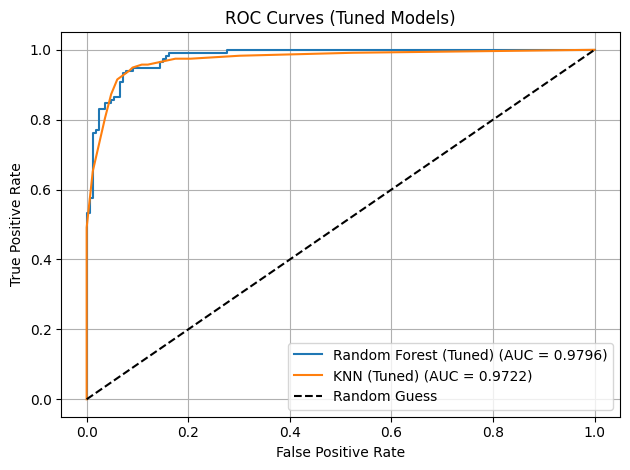

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

print('FOR CV = 5')
# GridSearchCV: Random Forest
rf_params = {
    'n_estimators': [100, 300, 500],
    'max_depth': [10, 15, 20],
    'class_weight': ['balanced']
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42),
                       rf_params, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
rf_pred = best_rf.predict(X_test)
rf_prob = best_rf.predict_proba(X_test)[:, 1]

# GridSearchCV: KNN
knn_params = {
    'n_neighbors': [5, 7, 9, 11, 13],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn_grid = GridSearchCV(KNeighborsClassifier(),
                        knn_params, cv=7, scoring='f1', n_jobs=-1)
knn_grid.fit(X_train, y_train)
best_knn = knn_grid.best_estimator_
knn_pred = best_knn.predict(X_test)
knn_prob = best_knn.predict_proba(X_test)[:, 1]


# Evaluation
def evaluate_model(y_true, y_pred, y_prob, model_name):
    print(f"\n--- {model_name} Classification Report ---")
    print(classification_report(y_true, y_pred))
    auc = roc_auc_score(y_true, y_prob)
    print(f"{model_name} ROC-AUC: {auc:.4f}")
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.4f})')

# Evaluate Models
evaluate_model(y_test, rf_pred, rf_prob, 'Random Forest (Tuned)')
evaluate_model(y_test, knn_pred, knn_prob, 'KNN (Tuned)')

# ROC Curve Plot
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves (Tuned Models)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

🔍 Model Performance Metrics:

Random Forest (Tuned):
  Accuracy: 0.9261
  Precision: 0.9008
  Recall: 0.9237
  F1-Score: 0.9121
  ROC-AUC: 0.9796

KNN (Tuned):
  Accuracy: 0.9261
  Precision: 0.8819
  Recall: 0.9492
  F1-Score: 0.9143
  ROC-AUC: 0.9722



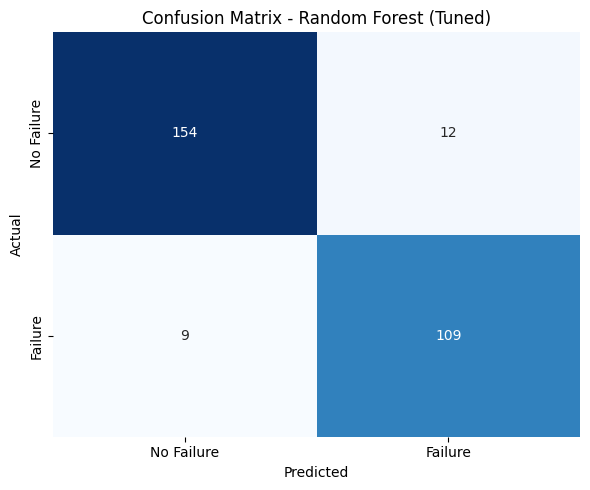

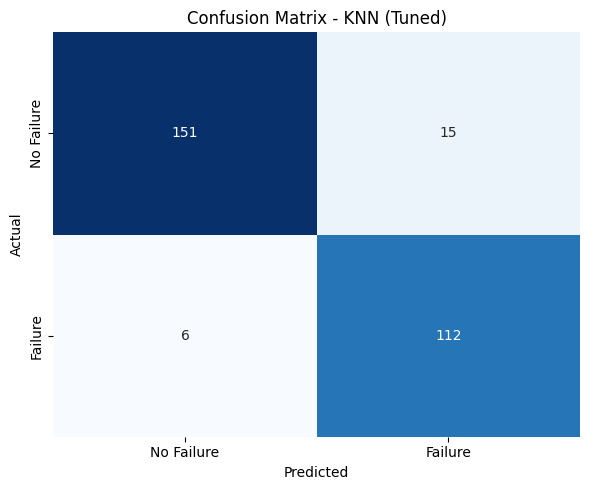

In [ ]:
##CV = 5

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create predictions dictionary using tuned models
predictions = {
    'Random Forest (Tuned)': (rf_pred, rf_prob),
    'KNN (Tuned)': (knn_pred, knn_prob)
}

#  Compute metrics
metrics = {}
for name, (pred, prob) in predictions.items():
    metrics[name] = {
        'Accuracy': accuracy_score(y_test, pred),
        'Precision': precision_score(y_test, pred),
        'Recall': recall_score(y_test, pred),
        'F1-Score': f1_score(y_test, pred),
        'ROC-AUC': roc_auc_score(y_test, prob)
    }

# Print metrics
print("🔍 Model Performance Metrics:\n")
for name, scores in metrics.items():
    print(f"{name}:")
    for metric, value in scores.items():
        print(f"  {metric}: {value:.4f}")
    print()

# Confusion Matrix Visualizations
for name, (pred, _) in predictions.items():
    cm = confusion_matrix(y_test, pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No Failure', 'Failure'],
                yticklabels=['No Failure', 'Failure'])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()


FOR CV = 10

--- Random Forest (Tuned) Classification Report ---
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       166
           1       0.88      0.91      0.90       118

    accuracy                           0.91       284
   macro avg       0.91      0.91      0.91       284
weighted avg       0.91      0.91      0.91       284

Random Forest (Tuned) ROC-AUC: 0.9772

--- KNN (Tuned) Classification Report ---
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       166
           1       0.88      0.95      0.91       118

    accuracy                           0.93       284
   macro avg       0.92      0.93      0.92       284
weighted avg       0.93      0.93      0.93       284

KNN (Tuned) ROC-AUC: 0.9722


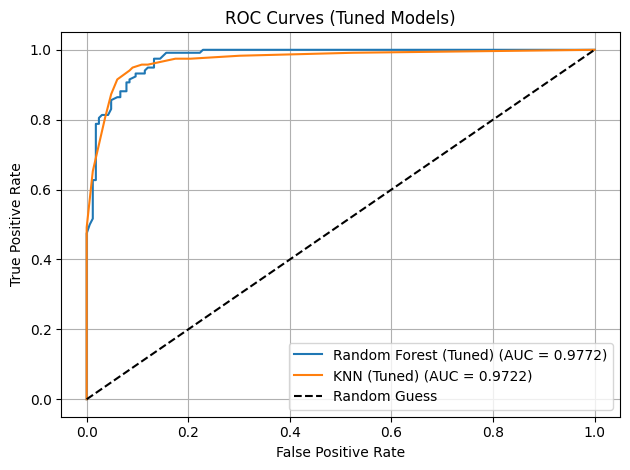

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
print('FOR CV = 10')
rf_params = {
    'n_estimators': [100, 300, 500],
    'max_depth': [10, 15, 20],
    'class_weight': ['balanced']
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42),
                       rf_params, cv=10,
                       scoring='f1', n_jobs=-1)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
rf_pred = best_rf.predict(X_test)
rf_prob = best_rf.predict_proba(X_test)[:, 1]

knn_params = {
    'n_neighbors': [5, 7, 9, 11, 13],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn_grid = GridSearchCV(KNeighborsClassifier(),
                        knn_params, cv=10, scoring='f1', n_jobs=-1)
knn_grid.fit(X_train, y_train)
best_knn = knn_grid.best_estimator_
knn_pred = best_knn.predict(X_test)
knn_prob = best_knn.predict_proba(X_test)[:, 1]

# -----------------------------
# Evaluation Function
# -----------------------------
def evaluate_model(y_true, y_pred, y_prob, model_name):
    print(f"\n--- {model_name} Classification Report ---")
    print(classification_report(y_true, y_pred))
    auc = roc_auc_score(y_true, y_prob)
    print(f"{model_name} ROC-AUC: {auc:.4f}")
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.4f})')

# Evaluate Models
evaluate_model(y_test, rf_pred, rf_prob, 'Random Forest (Tuned)')
evaluate_model(y_test, knn_pred, knn_prob, 'KNN (Tuned)')

# ROC Curve Plot
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves (Tuned Models)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Model Performance Metrics: (CV=10)

Random Forest (Tuned):
  Accuracy: 0.9120
  Precision: 0.8843
  Recall: 0.9068
  F1-Score: 0.8954
  ROC-AUC: 0.9772

KNN (Tuned):
  Accuracy: 0.9261
  Precision: 0.8819
  Recall: 0.9492
  F1-Score: 0.9143
  ROC-AUC: 0.9722



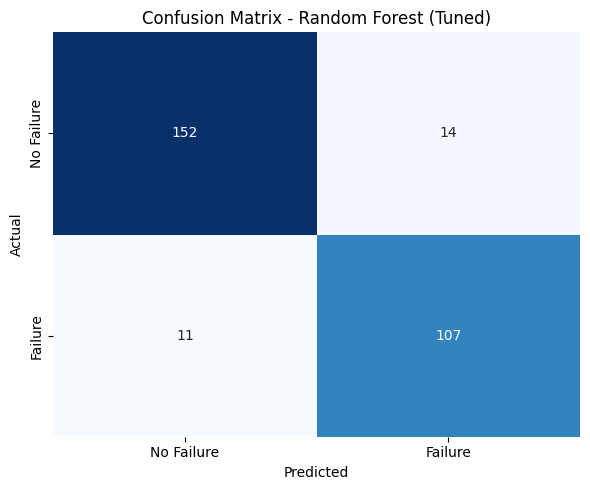

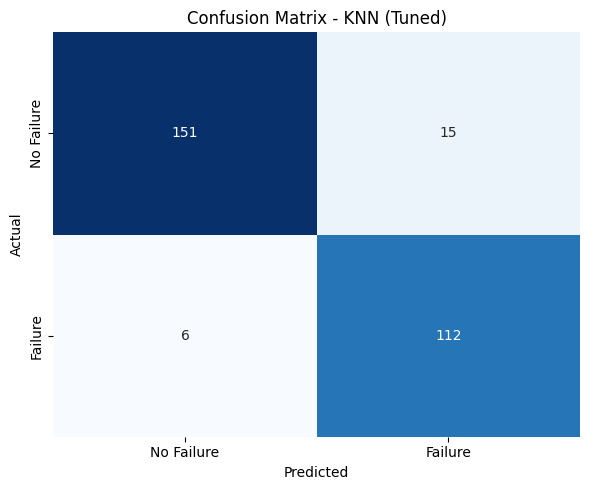

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create predictions dictionary using tuned models
predictions = {
    'Random Forest (Tuned)': (rf_pred, rf_prob),
    'KNN (Tuned)': (knn_pred, knn_prob)
}

# Compute metrics
metrics = {}
for name, (pred, prob) in predictions.items():
    metrics[name] = {
        'Accuracy': accuracy_score(y_test, pred),
        'Precision': precision_score(y_test, pred),
        'Recall': recall_score(y_test, pred),
        'F1-Score': f1_score(y_test, pred),
        'ROC-AUC': roc_auc_score(y_test, prob)
    }

# Print metrics
print("Model Performance Metrics: (CV=10)\n")
for name, scores in metrics.items():
    print(f"{name}:")
    for metric, value in scores.items():
        print(f"  {metric}: {value:.4f}")
    print()

#Confusion Matrix Visualizations
for name, (pred, _) in predictions.items():
    cm = confusion_matrix(y_test, pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No Failure', 'Failure'],
                yticklabels=['No Failure', 'Failure'])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()


Model Performance Metrics:

Random Forest (Tuned):
  Accuracy: 0.9261
  Precision: 0.9008
  Recall: 0.9237
  F1-Score: 0.9121
  ROC-AUC: 0.9796

KNN (Tuned):
  Accuracy: 0.9261
  Precision: 0.8819
  Recall: 0.9492
  F1-Score: 0.9143
  ROC-AUC: 0.9675



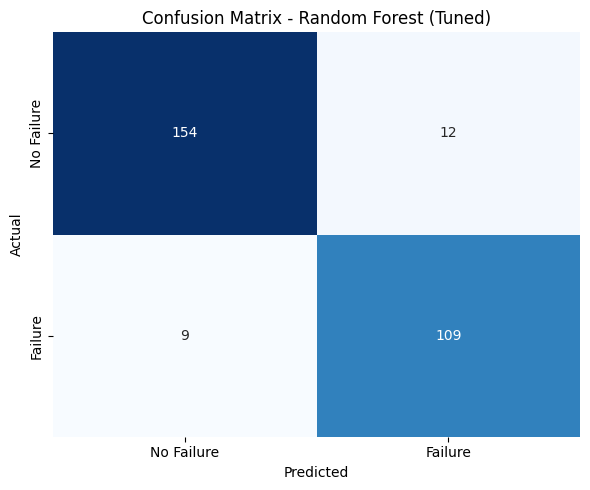

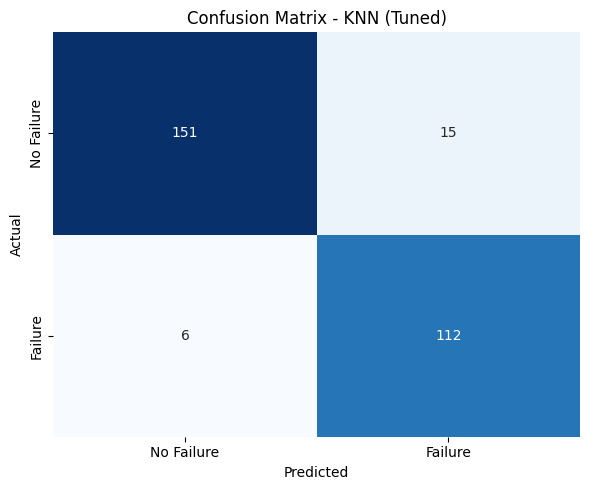

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create predictions dictionary using tuned models
predictions = {
    'Random Forest (Tuned)': (rf_pred, rf_prob),
    'KNN (Tuned)': (knn_pred, knn_prob)
}

# Compute metrics
metrics = {}
for name, (pred, prob) in predictions.items():
    metrics[name] = {
        'Accuracy': accuracy_score(y_test, pred),
        'Precision': precision_score(y_test, pred),
        'Recall': recall_score(y_test, pred),
        'F1-Score': f1_score(y_test, pred),
        'ROC-AUC': roc_auc_score(y_test, prob)
    }

# Print metrics
print("🔍 Model Performance Metrics:\n")
for name, scores in metrics.items():
    print(f"{name}:")
    for metric, value in scores.items():
        print(f"  {metric}: {value:.4f}")
    print()

# Confusion Matrix Visualizations
for name, (pred, _) in predictions.items():
    cm = confusion_matrix(y_test, pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No Failure', 'Failure'],
                yticklabels=['No Failure', 'Failure'])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()
